Trying to predict the probability of `Response`

Trying to predict the probability of `Response`

In [1]:
# from google.colab import userdata
# import os

# os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')
# os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')

# import kaggle
# from kaggle.api.kaggle_api_extended import KaggleApi

# api = KaggleApi()
# api.authenticate()
# !kaggle competitions download -c playground-series-s4e7
# !unzip /content/playground-series-s4e7.zip -d /content/playground-series-s4e7_data/
## api.competitions_data_download_files('playground-series-s4e7')
## api.dataset_download_files(, path='playground-series-s4e7', unzip=True)

playground-series-s4e7.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/playground-series-s4e7.zip
replace /content/playground-series-s4e7_data/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/playground-series-s4e7_data/sample_submission.csv  
replace /content/playground-series-s4e7_data/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/playground-series-s4e7_data/test.csv  y

replace /content/playground-series-s4e7_data/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: /content/playground-series-s4e7_data/train.csv  y



##### Dependencies

In [18]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

##### Import Data

In [19]:
train = pd.read_csv('/content/playground-series-s4e7_data/train.csv', index_col="id")

##### Dtypes

In [20]:
def clean_data(df: pd.DataFrame) -> pd.DataFrame:
  df.Region_Code = df.Region_Code.astype("int8")
  df.Previously_Insured = df.Previously_Insured.astype("int8")
  df.Driving_License = df.Driving_License.astype("int8")
  df.Gender = df.Gender.map({"Male": 1, "Female": 0})
  df.Vehicle_Damage = df.Vehicle_Damage.map({"Yes": 1, "No": 0})
  vehicle_age = pd.get_dummies(df.Vehicle_Age, drop_first=True)
  df[["< 1 Year", "> 2 Years"]] = vehicle_age
  df.drop(columns="Vehicle_Age", inplace=True)
  region_dummies = pd.get_dummies(df.Region_Code, drop_first=True)
  regions = pd.get_dummies(df.Region_Code, drop_first=True)
  # df.drop(columns="Region_Code", inplace=True)
  # df = pd.concat([df, regions], axis=1)
  return df


In [21]:
train = clean_data(train)

##### Cleaning

In [ ]:
train[train.isna().any(axis=1)].__len__()

0

In [ ]:
train.duplicated().sum()

0

In [6]:
train, test = train_test_split(train, test_size=0.2, random_state=42)

##### EDA

<Axes: xlabel='Age'>

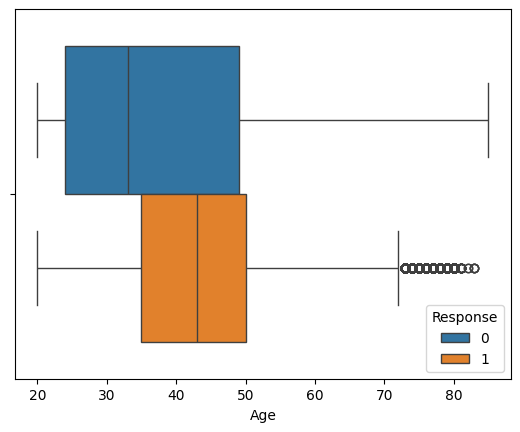

In [ ]:
# Age and Response

sns.boxplot(data=train, x="Age", hue="Response")

<Axes: xlabel='Annual_Premium'>

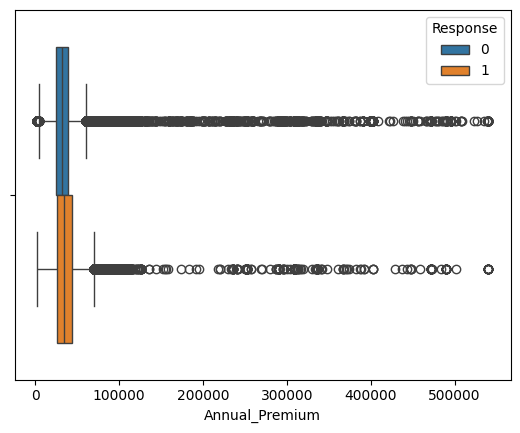

In [ ]:
# Response and Annual_Premium

sns.boxplot(data=train, x="Annual_Premium", hue="Response")

<Axes: xlabel='Policy_Sales_Channel'>

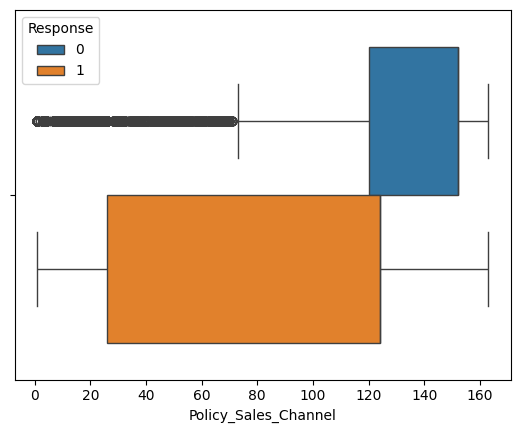

In [ ]:
# Resposne and Policy_Sales_Channel

sns.boxplot(data=train, x="Policy_Sales_Channel", hue="Response")

In [ ]:
# Response and Vintage

sns.boxplot(data=train, x="Vintage", hue="Response")

In [ ]:
# don't include vintage or annual premium, it isn't useful
# previouslt insured and vehicle damage negatively correlated (-0.8) keep only vehicle damage
# transform features for standardisation
# build two models
# select features using wrapper methods

In [ ]:
train.corr().style.background_gradient(cmap='magma')

In [ ]:
train[["Vehicle_Age", "Response"]].groupby("Vehicle_Age").value_counts(normalize=True)

##### Model Building

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
# SVM?
# Random Forest?
# XGBoost?

In [23]:
# Standardise Features
# Region_Code to be dummified, Annual_premium, Policy_sales_Channel, Vintage
premium_scaler = StandardScaler()
scaled_premium = premium_scaler.fit_transform(train.Annual_Premium.values.reshape(-1, 1))
train.Annual_Premium = scaled_premium

In [24]:
logreg = LogisticRegression()

In [25]:
independent_vars = [col for col in train.columns if col not in ["Previously_Insured", "Annual_Premium", "Vintage", "Region_Code", "Response"]]
features = train[independent_vars]
response = train.Response
features.columns = features.columns.astype(str)

In [26]:
logreg.fit(features, response)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
scaled_premium = premium_scaler.transform(test.Annual_Premium.values.reshape(-1,1))
test.Annual_Premium = scaled_premium

In [28]:
y_pred = logreg.predict(test[independent_vars])

In [29]:
roc_auc_score(test["Response"], y_pred)

0.500002881670609